### 数据读取与展示

In [1]:
# 使用tf.keras搭建分类模型，数据集使用fashion_mnist
#导入必要的库即版本

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 2.2.3
numpy 1.16.4
pandas 0.23.4
sklearn 0.19.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
#导入数据集并拆分数据集
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_valid.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (5000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


### 增加代码归一化

In [3]:
# 归一化方法：x = (x - u) / std 均值，方差

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train:[None, 28, 28] -> [None, 784]
# 除了transform功能还有fit的功能（记住训练集的均值方差），验证集和测试集需要使用训练集的均值和方差
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28,1)

### 模型构建
不同版本API，代码不尽相同


20层的深度神经网络


In [4]:
# 使用tf.keras.model.Sequential()构建模型
# 创建Sequential对象
# keras中已经实现深度可分离卷积，可以直接调用
# 输入层仍使用卷积
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                             padding='same',
                             activation='relu',
                             input_shape=(28,28,1)))

model.add(keras.layers.SeparableConv2D(filters=32, kernel_size=3,
                                       padding='same',
                                       activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='relu'))
model.add(keras.layers.SeparableConv2D(filters=64, kernel_size=3,
                                       padding='same',
                                       activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='relu'))
model.add(keras.layers.SeparableConv2D(filters=128, kernel_size=3,
                                       padding='same',
                                       activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd', metrics=['accuracy'])

### 增加回调函数

In [5]:
# 开启训练fit函数
# epochs训练次数，history返回为中间运算的一些结果
# 回调函数fit函数中添加数组
# Tensorboard,earlystopping,ModelCheckpoint
#Tensorboard需要一个文件夹,ModelCheckpoint需要一个文件名
#在当前文件夹下定义一个名为callbacks的文件夹，如果不存在，便创建它
logdir = './Separable_cnn_selu_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
# 定义输出model的文件,也是在callbacks文件夹下
output_model_file = os.path.join(logdir,
                                'fashion_mnist_model.h5')
callbacks = [
    #keras.callbacks.TensorBoard(logdir),
    # 保存最好的模型，否则默认保存最近的模型
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_onlly=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]

history = model.fit(x_train_scaled, y_train, epochs=10,
         validation_data=(x_valid_scaled,y_valid),
                   callbacks=callbacks)

W0819 12:38:39.618394  3696 deprecation.py:323] From D:\SoftWare\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 71s 1ms/sample - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1002
Epoch 2/10
55000/55000 [==============================] - 72s 1ms/sample - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 3/10
55000/55000 [==============================] - 84s 2ms/sample - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 88s 2ms/sample - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0986
Epoch 5/10
55000/55000 [==============================] - 82s 1ms/sample - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 6/10
55000/55000 [==============================] - 80s 1ms/sample - loss: 2.3027 - accuracy: 0.0971 - val_loss: 2.3028 - val_accuracy: 0.0976


查看tensorboard，在命令行中输入tensorboard --logdir=callbacks,构建一个个人服务器，通过6006端口进行访问，在浏览器中输入localhost:6006查看tensorfboard

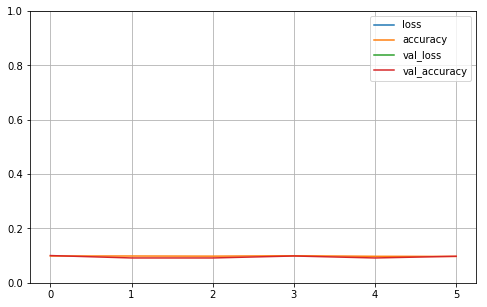

In [6]:
# 将history中的值可视化出来
def plot_learning_curves(history):
    #直接转换为DataFrame
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    # 显示网格
    plt.grid(True)
    # 设置坐标轴范围
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

批归一化可以缓解梯度消失

In [7]:
model.evaluate(x_test_scaled, y_test)

10000/10000 [==============================] - 4s 437us/sample - loss: 2.3026 - accuracy: 0.1000


[2.3026088874816892, 0.1]

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
separable_conv2d (SeparableC (None, 28, 28, 32)        1344      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 14, 14, 64)        2400      
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 14, 14, 64)        4736      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 7, 7, 128)         8

In [ ]:
深度可分离卷积是以精度损失的代价换取计算量的减少和参数的减少，从而使深度可分离网络在手机端可以运行